In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import humanize
import plotly.express as px

In [2]:
sns.set_style('darkgrid')

In [3]:
apartments = pd.read_csv('../../data/processed/apartments.csv')
chapinero =  apartments[(apartments['tipo_operacion'] == 'VENTA') & (apartments['localidad'] == 'CHAPINERO') & (apartments['coords_modified'] == False)]
chapinero = chapinero.drop(columns=['precio_arriendo'])
chapinero.head()

,codigo,tipo_propiedad,tipo_operacion,precio_venta,area,habitaciones,banos,administracion,parqueaderos,sector,...,permite_mascotas,gimnasio,ascensor,conjunto_cerrado,coords_modified,localidad,barrio,estacion_tm_cercana,distancia_estacion_tm_m,is_cerca_estacion_tm
6,3390-M4320821,APARTAMENTO,VENTA,3.900000e+09,432.00,4.0,5.0,3000000.0,4.0,CHICO,...,0,0,1,1,False,CHAPINERO,S.C. EL NOGAL,Héroes,957.43,0
17,897-M4156030,APARTAMENTO,VENTA,3.900000e+08,40.00,1.0,2.0,NaN,1.0,CHAPINERO ALTO,...,0,0,1,0,False,CHAPINERO,S.C. CHAPINERO CENTRAL,Calle 57,255.43,1
18,11301-1492,APARTAMENTO,VENTA,2.100000e+09,350.00,3.0,4.0,2040000.0,3.0,OTROS,...,0,1,1,0,False,CHAPINERO,CHICO ORIENTAL,Calle 85,2151.16,0
19,11013-M4424136,APARTAMENTO,VENTA,8.450000e+08,138.96,3.0,4.0,1170000.0,2.0,CHICO,...,0,0,1,0,False,CHAPINERO,S.C. CHICO NORTE,Virrey,1088.12,0
20,293-M3798297,APARTAMENTO,VENTA,1.700000e+09,178.00,3.0,4.0,1128000.0,3.0,CHAPINERO ALTO,...,0,1,1,0,False,CHAPINERO,ZAMUDIO,Flores,1140.18,0


In [4]:
chapinero.datetime = pd.to_datetime(chapinero.datetime)
chapinero.fecha_actualizacion_precio_venta = pd.to_datetime(chapinero.fecha_actualizacion_precio_venta)

In [5]:
chapinero.shape

(10476, 37)

In [6]:
chapinero.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10476 entries, 6 to 62400
Data columns (total 37 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   codigo                               10476 non-null  object        
 1   tipo_propiedad                       10476 non-null  object        
 2   tipo_operacion                       10476 non-null  object        
 3   precio_venta                         10476 non-null  float64       
 4   area                                 10476 non-null  float64       
 5   habitaciones                         10476 non-null  float64       
 6   banos                                10476 non-null  float64       
 7   administracion                       9542 non-null   float64       
 8   parqueaderos                         10476 non-null  float64       
 9   sector                               10094 non-null  object        
 10  estrato        

In [7]:
chapinero.columns

Index(['codigo', 'tipo_propiedad', 'tipo_operacion', 'precio_venta', 'area',
       'habitaciones', 'banos', 'administracion', 'parqueaderos', 'sector',
       'estrato', 'antiguedad', 'estado', 'longitud', 'latitud', 'descripcion',
       'datetime', 'website', 'compañia', 'fecha_actualizacion_precio_venta',
       'precio_venta_anterior', 'fecha_actualizacion_precio_arriendo',
       'precio_arriendo_anterior', 'jacuzzi', 'piso', 'closets', 'chimenea',
       'permite_mascotas', 'gimnasio', 'ascensor', 'conjunto_cerrado',
       'coords_modified', 'localidad', 'barrio', 'estacion_tm_cercana',
       'distancia_estacion_tm_m', 'is_cerca_estacion_tm'],
      dtype='object')

In [8]:
def format_tick_humanize(value, tick_number):
    return humanize.intword(value)

# Eliminar outliers

Eliminamos los precios que son outliers

c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


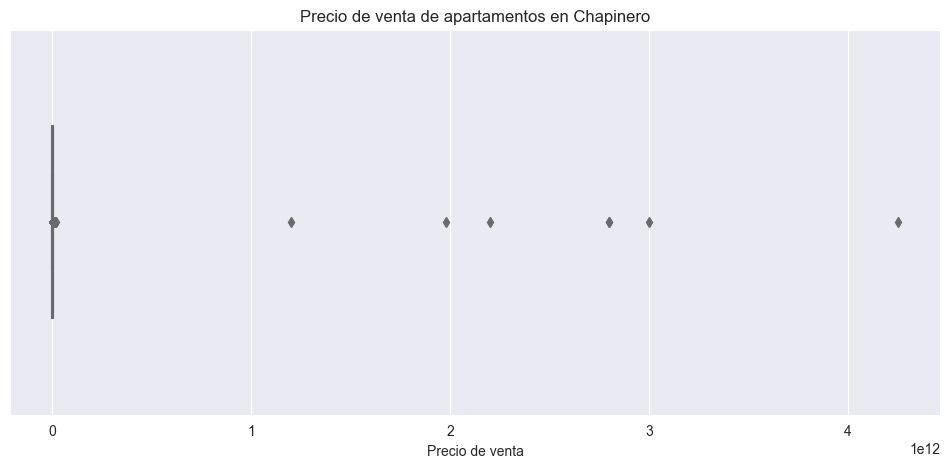

In [9]:
plt.figure(figsize=(12, 5))

sns.boxplot(
    chapinero,
    x='precio_venta',
    width=.5,
    palette='Set3',
)

plt.title('Precio de venta de apartamentos en Chapinero')
plt.xlabel('Precio de venta')
plt.show()

In [10]:
Q1 = chapinero['precio_venta'].quantile(0.25)
Q3 = chapinero['precio_venta'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = chapinero[(chapinero['precio_venta'] < lower) | (chapinero['precio_venta'] > upper)]
outliers.shape

(471, 37)

In [11]:
chapinero = chapinero[(chapinero['precio_venta'] > lower) & (chapinero['precio_venta'] < upper)]
chapinero.shape

(10005, 37)

# Analisis Univariado

## Area (m2)

### Eliminar outliers

In [12]:
# eliminar area igual a 0

chapinero = chapinero[chapinero['area'] > 0]

Eliminamos las areas (m2) que son outliers

In [13]:
Q1 = chapinero['area'].quantile(0.25)
Q3 = chapinero['area'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = chapinero[(chapinero['area'] < lower) | (chapinero['area'] > upper)]
outliers.shape

(124, 37)

In [14]:
chapinero = chapinero[(chapinero['area'] > lower) & (chapinero['area'] < upper)]
chapinero.shape

(9845, 37)

### Analisis

In [15]:
chapinero.area.describe().apply(lambda x: humanize.intcomma(x)).to_frame().T

,count,mean,std,min,25%,50%,75%,max
area,"9,845.0",168.8636465210767,85.95314229785106,1.0,100.0,159.0,229.0,425.0


c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


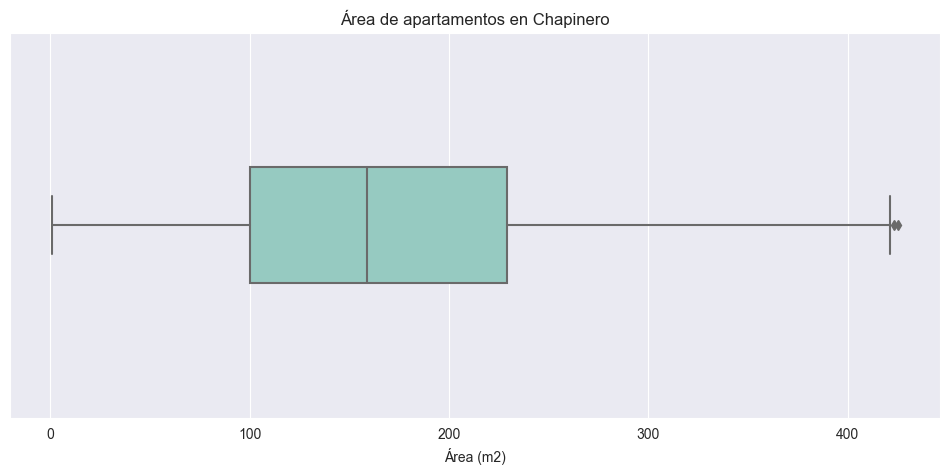

In [16]:
plt.figure(figsize=(12, 5))

sns.boxplot(
    chapinero,
    x='area',
    width=.3,
    palette='Set3',
)

plt.title('Área de apartamentos en Chapinero')
plt.xlabel('Área (m2)')
plt.show()

c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


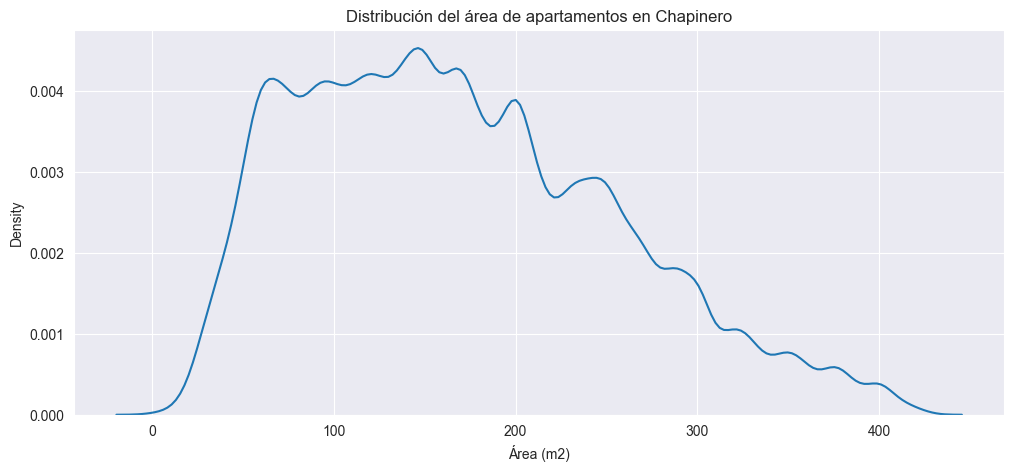

In [17]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    chapinero,
    x='area',
    bw_adjust=.5,
)

plt.title('Distribución del área de apartamentos en Chapinero')
plt.xlabel('Área (m2)')
plt.show()

### Cercania a Transmilenio

c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is depr

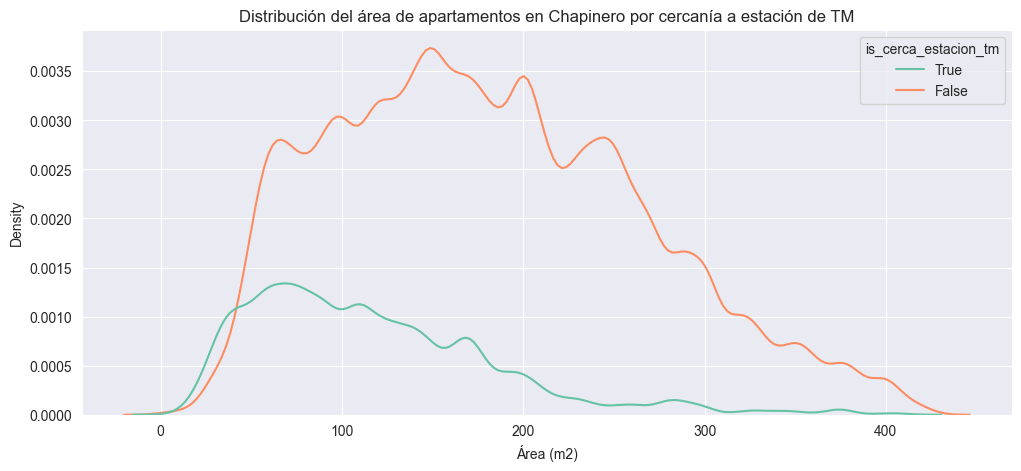

In [18]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    chapinero,
    x='area',
    bw_adjust=.5,
    hue='is_cerca_estacion_tm',
    palette='Set2',
    hue_order=[True, False],
)

plt.title('Distribución del área de apartamentos en Chapinero por cercanía a estación de TM')
plt.xlabel('Área (m2)')
plt.show()

c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is depr

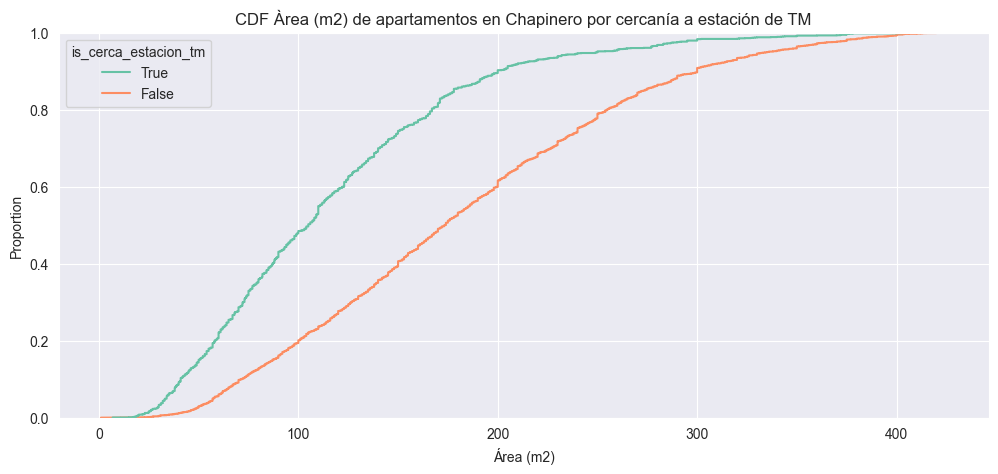

In [19]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    chapinero,
    x='area',
    hue='is_cerca_estacion_tm',
    palette='Set2',
    hue_order=[True, False],
)

plt.title('CDF Àrea (m2) de apartamentos en Chapinero por cercanía a estación de TM')
plt.xlabel('Área (m2)')
plt.show()


### Estrato

In [20]:
chapinero.groupby('estrato')['area'].describe().applymap(lambda x: round(x, 1))

C:\Users\erik1\AppData\Local\Temp\ipykernel_3612\612561738.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  chapinero.groupby('estrato')['area'].describe().applymap(lambda x: round(x, 1))


,count,mean,std,min,25%,50%,75%,max
estrato,,,,,,,,
0.0,10.0,217.7,122.1,104.0,111.8,165.0,344.0,400.0
1.0,16.0,131.9,58.3,29.0,80.2,134.1,167.4,253.0
2.0,8.0,77.9,101.5,27.0,29.2,37.0,67.0,325.0
3.0,205.0,61.8,41.8,6.9,37.0,47.0,75.0,280.0
4.0,907.0,87.1,53.0,14.0,53.0,73.0,105.0,343.0
5.0,995.0,131.9,66.1,20.0,83.0,119.0,171.0,420.0
6.0,7697.0,186.2,83.0,1.0,123.0,177.0,244.0,425.0


c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


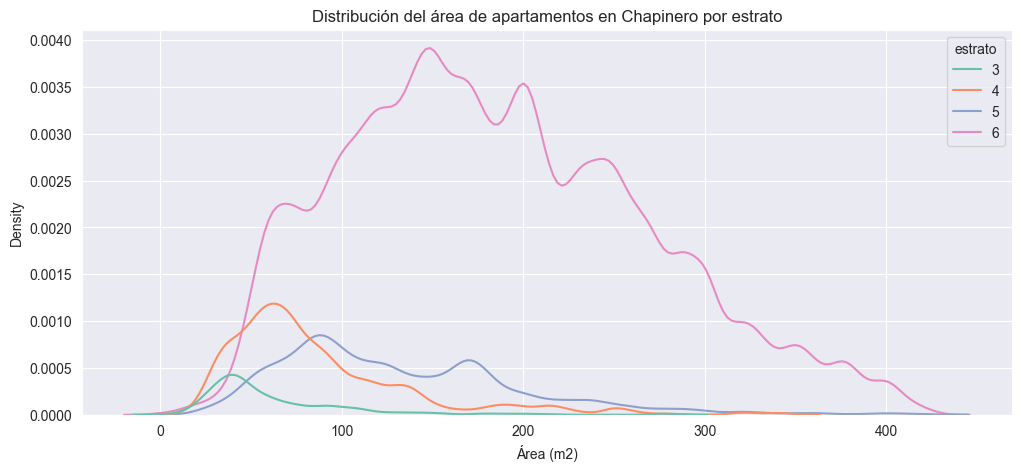

In [21]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    chapinero,
    x='area',
    bw_adjust=.5,
    hue='estrato',
    hue_order=[3, 4, 5, 6],
    palette='Set2',
)

plt.title('Distribución del área de apartamentos en Chapinero por estrato')
plt.xlabel('Área (m2)')
plt.show()

c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


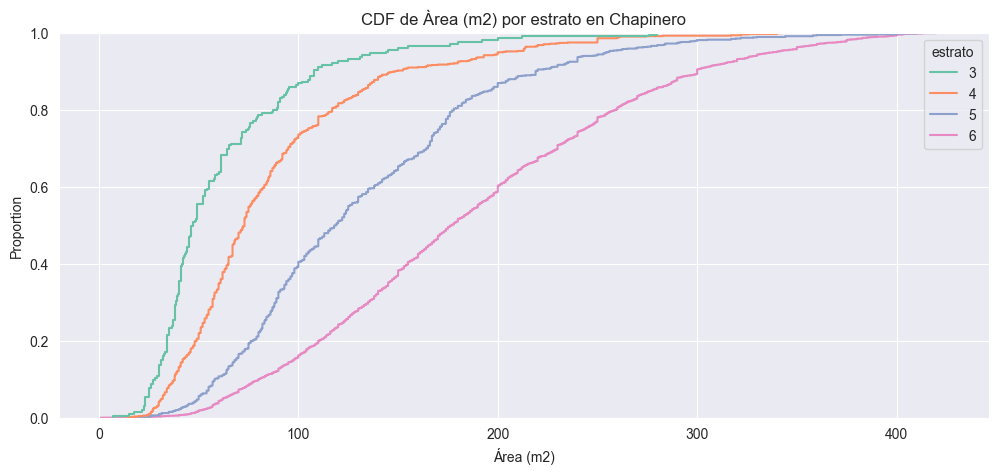

In [22]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    chapinero,
    x='area',
    hue='estrato',
    palette='Set2',
    hue_order=[3, 4, 5, 6],
)

plt.title('CDF de Àrea (m2) por estrato en Chapinero')
plt.xlabel('Área (m2)')
plt.show()

### Antiguedad

In [23]:
chapinero.groupby('antiguedad')['area'].describe().applymap(lambda x: round(x, 1))

C:\Users\erik1\AppData\Local\Temp\ipykernel_3612\4051010735.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  chapinero.groupby('antiguedad')['area'].describe().applymap(lambda x: round(x, 1))


,count,mean,std,min,25%,50%,75%,max
antiguedad,,,,,,,,
ENTRE 0 Y 5 ANOS,1529.0,134.3,79.5,1.0,67.0,123.5,183.0,404.0
ENTRE 10 Y 20 ANOS,2099.0,169.1,86.0,8.0,100.0,160.0,230.0,417.0
ENTRE 5 Y 10 ANOS,1618.0,154.0,81.9,6.9,84.0,140.0,206.6,412.0
MAS DE 20 ANOS,4205.0,184.5,84.4,4.0,118.0,174.0,240.9,423.0
REMODELADO,389.0,195.3,91.1,27.0,130.0,195.0,251.0,425.0


c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

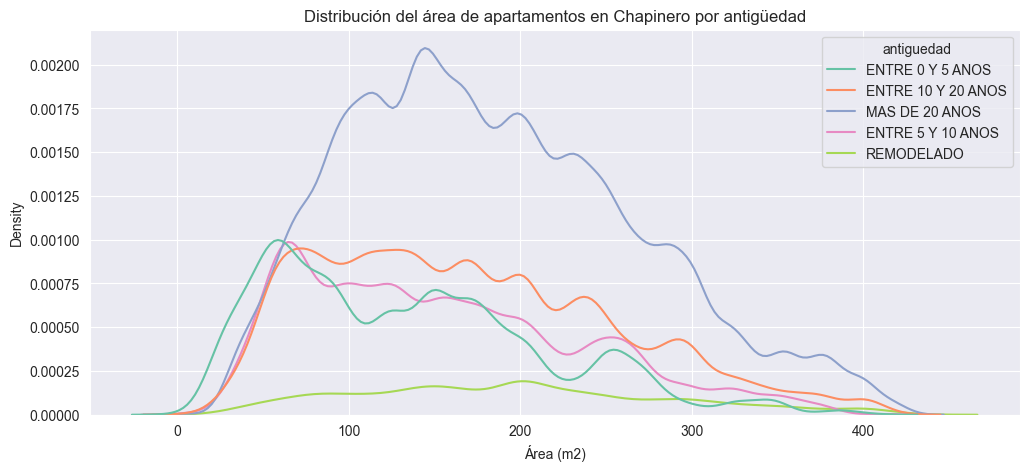

In [24]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    chapinero,
    x='area',
    bw_adjust=.5,
    hue='antiguedad',
    palette='Set2',
)

plt.title('Distribución del área de apartamentos en Chapinero por antigüedad')
plt.xlabel('Área (m2)')
plt.show()

c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

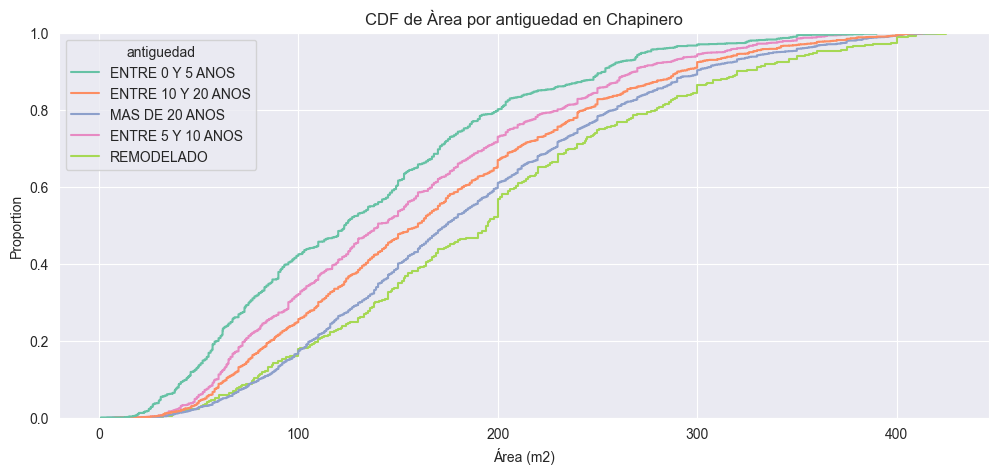

In [25]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    chapinero,
    x='area',
    hue='antiguedad',
    palette='Set2',
)

plt.title('CDF de Àrea por antiguedad en Chapinero')
plt.xlabel('Área (m2)')
plt.show()

Lo apartamentos mas recientes tienden a tener un Àrea menor que los mas antiguos

### Estacion de TM Cercana

In [26]:
estacion_tm_cercana = chapinero[chapinero['is_cerca_estacion_tm'] == True]
estacion_tm_cercana_stats = estacion_tm_cercana.groupby('estacion_tm_cercana')['area'].describe().applymap(lambda x: round(x, 1)).sort_values(by='mean', ascending=False)
estacion_tm_cercana_stats

C:\Users\erik1\AppData\Local\Temp\ipykernel_3612\285312945.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  estacion_tm_cercana_stats = estacion_tm_cercana.groupby('estacion_tm_cercana')['area'].describe().applymap(lambda x: round(x, 1)).sort_values(by='mean', ascending=False)


,count,mean,std,min,25%,50%,75%,max
estacion_tm_cercana,,,,,,,,
Héroes,27.0,149.8,97.3,34.0,98.0,116.0,179.0,403.0
Virrey,412.0,140.2,74.8,38.0,77.0,120.0,177.2,408.0
Calle 85,424.0,128.9,55.2,31.8,85.0,123.9,167.2,400.0
Calle 100,475.0,127.5,65.5,17.0,77.0,121.0,160.5,378.0
Calle 72,21.0,111.7,68.4,40.0,66.7,77.9,155.0,260.0
Calle 76,45.0,110.0,58.2,30.9,58.0,100.0,131.8,321.2
Flores,36.0,107.9,69.5,30.0,59.5,96.5,125.2,370.0
Avenida 39,24.0,81.1,35.7,29.0,51.8,85.0,116.9,134.2
Calle 45,72.0,77.2,44.6,29.0,39.5,61.0,102.5,193.0


c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


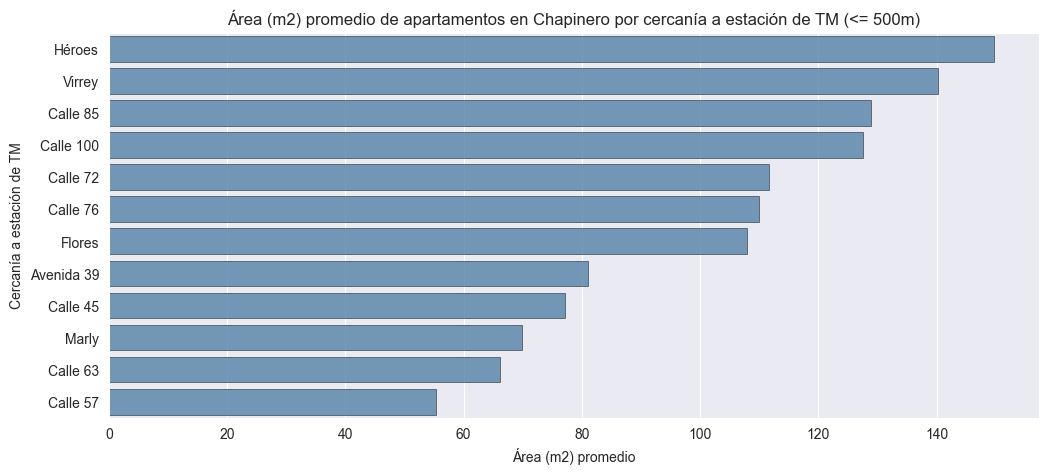

In [27]:
plt.figure(figsize=(12, 5))

sns.barplot(
    estacion_tm_cercana_stats,
    y=estacion_tm_cercana_stats.index,
    x='mean',
    # palette='Set2',
    color='steelblue',
    edgecolor='black',
    linewidth=.4,
    alpha=.8,
)

plt.title('Área (m2) promedio de apartamentos en Chapinero por cercanía a estación de TM (<= 500m)')
plt.xlabel('Área (m2) promedio')
plt.ylabel('Cercanía a estación de TM')
plt.show()

c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x500 with 0 Axes>

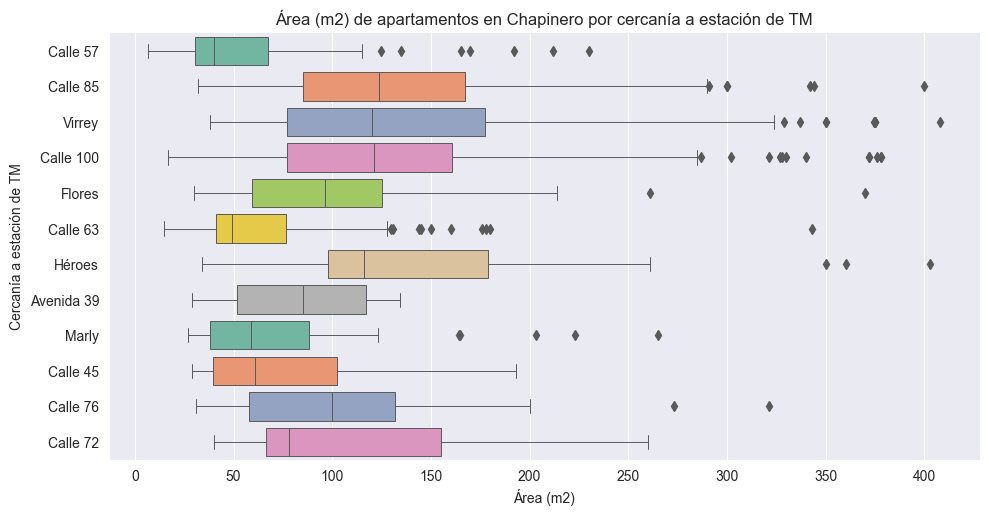

In [28]:
plt.figure(figsize=(12, 5))

sns.catplot(
    data=estacion_tm_cercana,
    x='area',
    y='estacion_tm_cercana',
    kind='box',
    height=5,
    aspect=2,
    palette='Set2',
    orient='h',
    linewidth=.7,
)

plt.title('Área (m2) de apartamentos en Chapinero por cercanía a estación de TM')
plt.xlabel('Área (m2)')
plt.ylabel('Cercanía a estación de TM')
plt.show()

## Precio de venta

In [29]:
chapinero.precio_venta.describe().apply(lambda x: humanize.intword(x)).to_frame().T

,count,mean,std,min,25%,50%,75%,max
precio_venta,9.8 thousand,1.4 billion,873.5 million,1.1 million,730.0 million,1.2 billion,1.9 billion,4.1 billion


c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


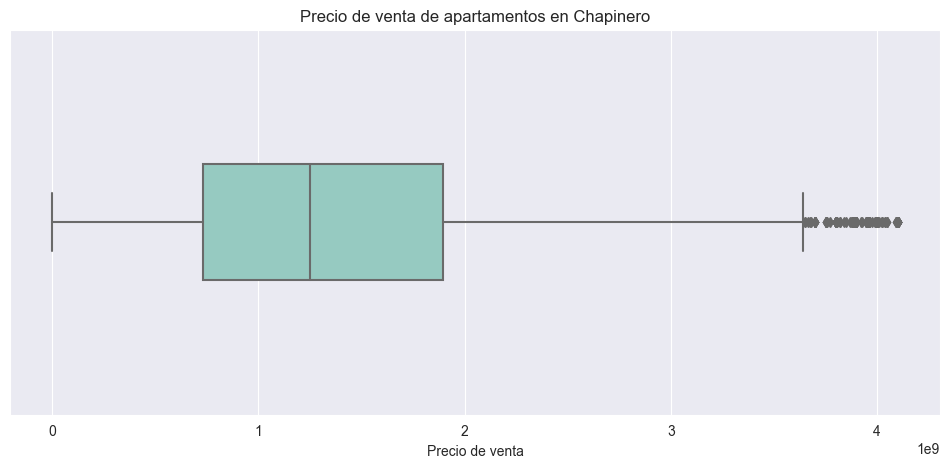

In [30]:
plt.figure(figsize=(12, 5))

sns.boxplot(
    chapinero,
    x='precio_venta',
    width=.3,
    palette='Set3',
)

plt.title('Precio de venta de apartamentos en Chapinero')
plt.xlabel('Precio de venta')
plt.show()

c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


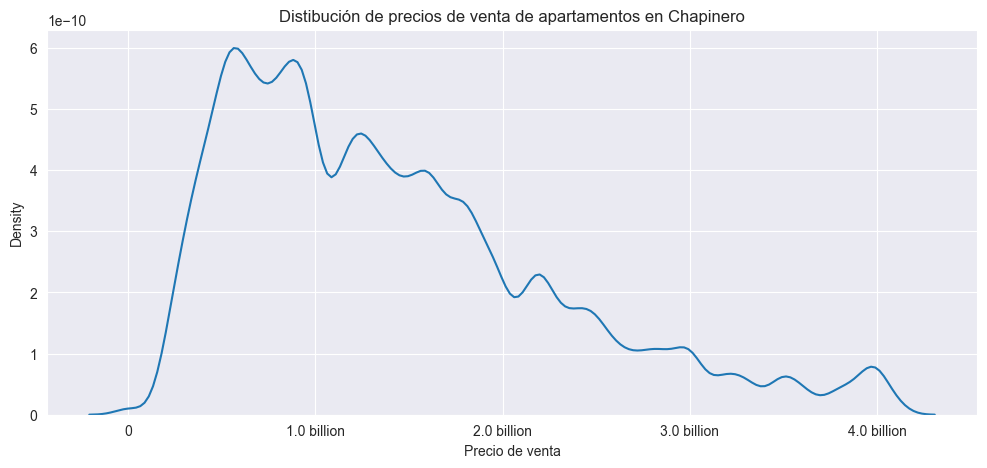

In [31]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    chapinero,
    x='precio_venta',
    bw_adjust=.5,
)

plt.title('Distibución de precios de venta de apartamentos en Chapinero')
plt.xlabel('Precio de venta')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

### Barrios

In [32]:
top_barrios = chapinero.groupby('barrio').agg(
    count=('barrio', 'count'),
    mean=('precio_venta', 'mean'),
    median=('precio_venta', 'median'),
    std=('precio_venta', 'std'),
).sort_values('mean', ascending=False)

# escoger los que tienen más de 20 registros para que sea más representativo
top_barrios = top_barrios[top_barrios['count'] > 22].head(10)
top_barrios.applymap(lambda x: humanize.intword(x))

C:\Users\erik1\AppData\Local\Temp\ipykernel_3612\3870089370.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  top_barrios.applymap(lambda x: humanize.intword(x))


,count,mean,median,std
barrio,,,,
LA CABRERA,490,2.1 billion,2.1 billion,894.2 million
URB. BELMONTE,23,2.1 billion,2.0 billion,703.7 million
S.C. EL RETIRO,207,2.0 billion,1.9 billion,937.3 million
CHICO ORIENTAL,195,2.0 billion,1.8 billion,879.7 million
PINAR ALTO - PINAR II,42,1.9 billion,1.7 billion,784.3 million
CHICO ALTO,164,1.9 billion,1.7 billion,757.8 million
ALTOS DE BELLAVISTA,25,1.9 billion,1.6 billion,783.5 million
BOSQUE EL RETIRO I SECTOR,236,1.8 billion,1.6 billion,909.3 million
S.C. EL BAGAZAL,33,1.8 billion,1.6 billion,810.0 million


c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


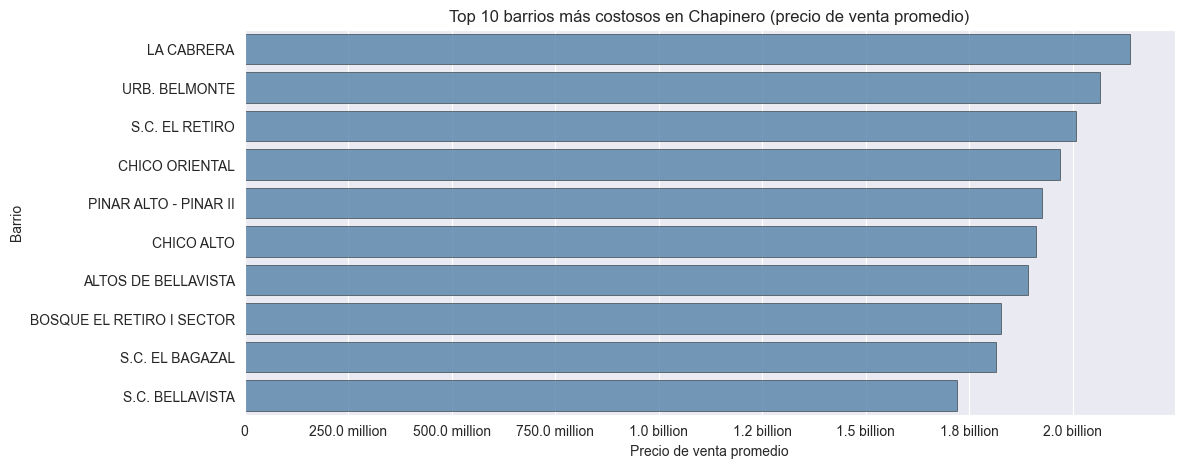

In [33]:
plt.figure(figsize=(12, 5))

sns.barplot(
    top_barrios,
    y=top_barrios.index,
    x='mean',
    color='steelblue',
    # palette='Set1',
    edgecolor='black',
    linewidth=.4,
    alpha=.8,
)

plt.title('Top 10 barrios más costosos en Chapinero (precio de venta promedio)')
plt.xlabel('Precio de venta promedio')
plt.ylabel('Barrio')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))

plt.show()

In [34]:
top_barrios_economicos = chapinero.groupby('barrio').agg(
    count=('barrio', 'count'),
    mean=('precio_venta', 'mean'),
    median=('precio_venta', 'median'),
    std=('precio_venta', 'std'),
).sort_values('mean', ascending=True)

top_barrios_economicos = top_barrios_economicos[top_barrios_economicos['count'] > 10].head(10)
top_barrios_economicos.applymap(lambda x: humanize.intword(x))

C:\Users\erik1\AppData\Local\Temp\ipykernel_3612\3806079773.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  top_barrios_economicos.applymap(lambda x: humanize.intword(x))


,count,mean,median,std
barrio,,,,
LOS OLIVOS,17,318.4 million,245.0 million,234.4 million
S.C. CHAPINERO CENTRAL,217,353.9 million,320.0 million,169.2 million
S.C. SUCRE,59,392.6 million,350.0 million,168.5 million
S.C. MARLY,63,438.3 million,350.0 million,363.4 million
S.C. CATALUNA,20,444.1 million,400.0 million,220.3 million
S.C. PARDO RUBIO,126,486.1 million,445.0 million,368.0 million
S.C. CHAPINERO NORTE,70,503.0 million,473.0 million,218.7 million
S.C. LA SALLE,97,516.3 million,470.0 million,191.1 million
S.C. MARIA CRISTINA,87,537.6 million,460.0 million,280.9 million


c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


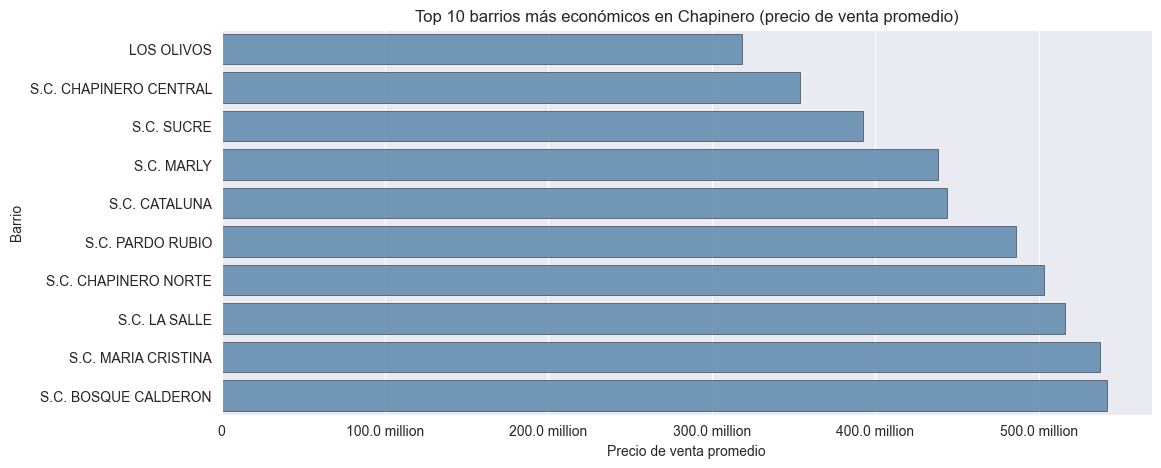

In [35]:
plt.figure(figsize=(12, 5))

sns.barplot(
    top_barrios_economicos,
    y=top_barrios_economicos.index,
    x='mean',
    color='steelblue',
    # palette='Set1',
    edgecolor='black',
    linewidth=.4,
    alpha=.8,
)

plt.title('Top 10 barrios más económicos en Chapinero (precio de venta promedio)')
plt.xlabel('Precio de venta promedio')
plt.ylabel('Barrio')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))

plt.show()

### Cercania a Transmilenio

In [36]:
chapinero.groupby('is_cerca_estacion_tm')['precio_venta'].describe().applymap(lambda x: humanize.intcomma(x))

C:\Users\erik1\AppData\Local\Temp\ipykernel_3612\3244808823.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  chapinero.groupby('is_cerca_estacion_tm')['precio_venta'].describe().applymap(lambda x: humanize.intcomma(x))


,count,mean,std,min,25%,50%,75%,max
is_cerca_estacion_tm,,,,,,,,
0,"7,985.0","1,537,992,648.134878","877,142,795.2607131","1,100,000.0","850,000,000.0","1,390,000,000.0","2,000,000,000.0","4,100,000,000.0"
1,"1,860.0","902,305,877.939785","638,651,933.7763745","2,100,000.0","470,000,000.0","715,000,000.0","1,150,000,000.0","4,000,000,000.0"


c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is depr

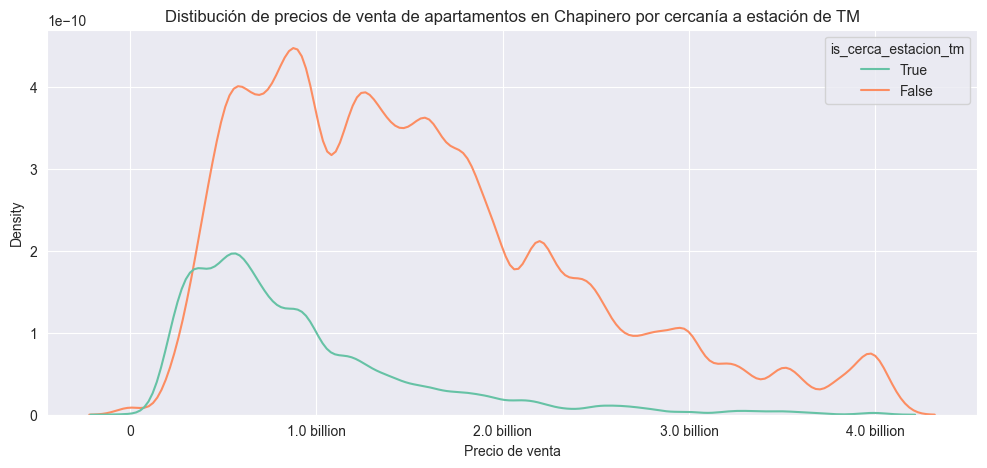

In [37]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    chapinero,
    x='precio_venta',
    bw_adjust=.5,
    hue='is_cerca_estacion_tm',
    hue_order=[True, False],
    palette='Set2',
)

plt.title('Distibución de precios de venta de apartamentos en Chapinero por cercanía a estación de TM')
plt.xlabel('Precio de venta')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is depr

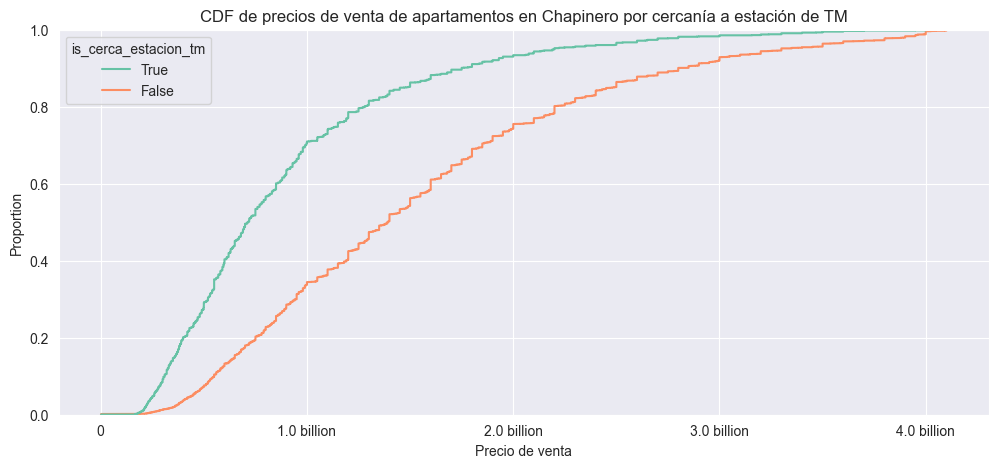

In [38]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    chapinero,
    x='precio_venta',
    hue='is_cerca_estacion_tm',
    hue_order=[True, False],
    palette='Set2',
)

plt.title('CDF de precios de venta de apartamentos en Chapinero por cercanía a estación de TM')
plt.xlabel('Precio de venta')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

### Estrato

In [39]:
chapinero.groupby('estrato')['precio_venta'].describe().applymap(lambda x: humanize.intword(x))

C:\Users\erik1\AppData\Local\Temp\ipykernel_3612\1885629083.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  chapinero.groupby('estrato')['precio_venta'].describe().applymap(lambda x: humanize.intword(x))


,count,mean,std,min,25%,50%,75%,max
estrato,,,,,,,,
0.0,10,1.8 billion,1.1 billion,660.0 million,867.5 million,1.5 billion,2.5 billion,3.8 billion
1.0,16,849.9 million,533.2 million,198.0 million,561.2 million,740.0 million,1.1 billion,2.4 billion
2.0,8,590.5 million,738.2 million,235.0 million,251.5 million,322.5 million,467.5 million,2.4 billion
3.0,205,372.6 million,215.7 million,175.0 million,263.5 million,320.0 million,388.0 million,1.8 billion
4.0,907,583.1 million,411.4 million,167.0 million,365.0 million,470.0 million,630.0 million,4.1 billion
5.0,995,1.1 billion,625.4 million,1.2 million,595.0 million,870.0 million,1.4 billion,4.0 billion
6.0,7.7 thousand,1.6 billion,860.4 million,1.1 million,915.0 million,1.4 billion,2.1 billion,4.1 billion


c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


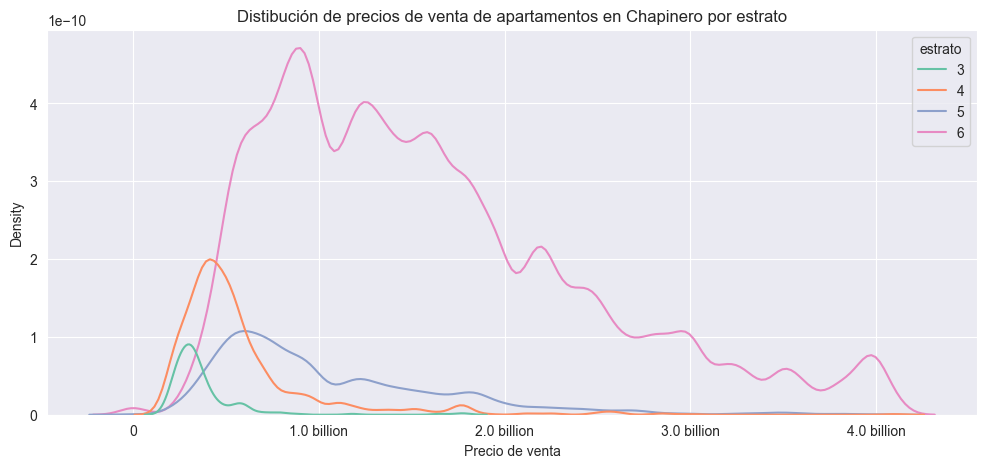

In [40]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    chapinero,
    x='precio_venta',
    bw_adjust=.5,
    hue='estrato',
    hue_order=[3, 4, 5, 6],
    palette='Set2',
)

plt.title('Distibución de precios de venta de apartamentos en Chapinero por estrato')
plt.xlabel('Precio de venta')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


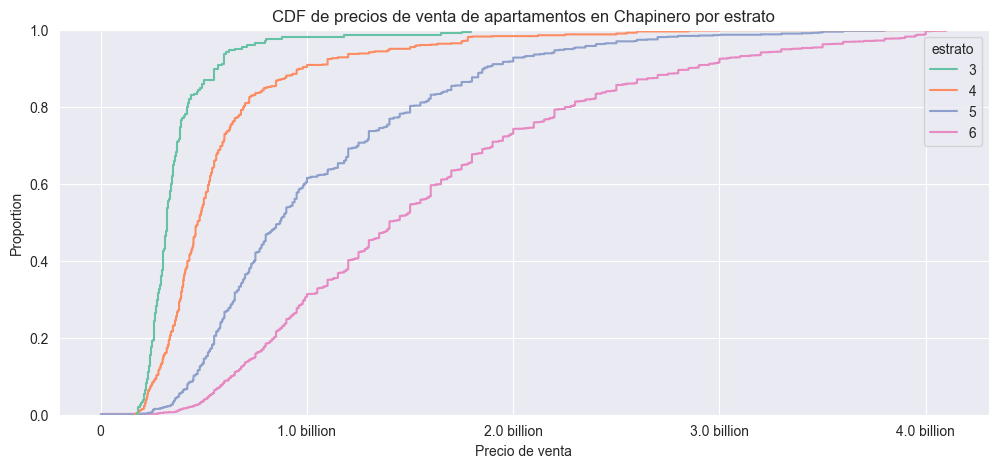

In [41]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    chapinero,
    x='precio_venta',
    hue='estrato',
    hue_order=[3, 4, 5, 6],
    palette='Set2',
)

plt.title('CDF de precios de venta de apartamentos en Chapinero por estrato')
plt.xlabel('Precio de venta')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

In [42]:
chapinero.columns

Index(['codigo', 'tipo_propiedad', 'tipo_operacion', 'precio_venta', 'area',
       'habitaciones', 'banos', 'administracion', 'parqueaderos', 'sector',
       'estrato', 'antiguedad', 'estado', 'longitud', 'latitud', 'descripcion',
       'datetime', 'website', 'compañia', 'fecha_actualizacion_precio_venta',
       'precio_venta_anterior', 'fecha_actualizacion_precio_arriendo',
       'precio_arriendo_anterior', 'jacuzzi', 'piso', 'closets', 'chimenea',
       'permite_mascotas', 'gimnasio', 'ascensor', 'conjunto_cerrado',
       'coords_modified', 'localidad', 'barrio', 'estacion_tm_cercana',
       'distancia_estacion_tm_m', 'is_cerca_estacion_tm'],
      dtype='object')

### Antiguedad del apartamento

c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

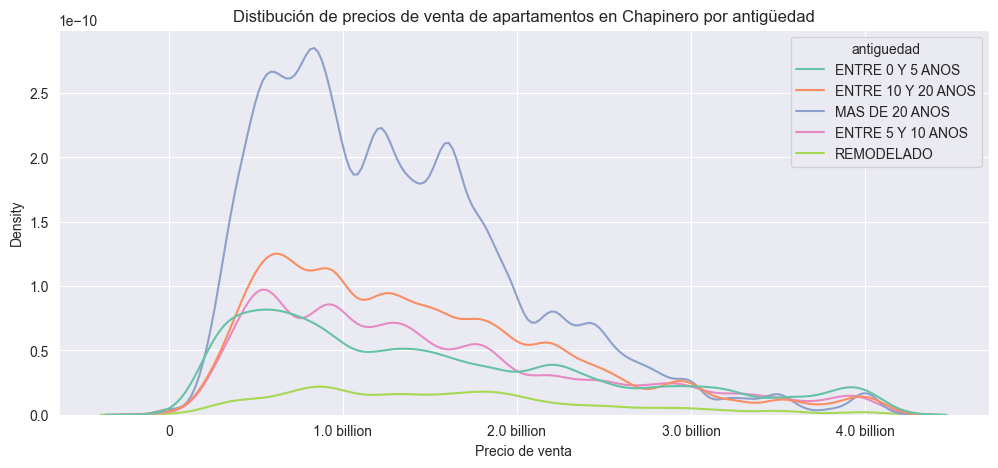

In [43]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    chapinero,
    x='precio_venta',
    bw_adjust=.5,
    hue='antiguedad',
    palette='Set2',
)

plt.title('Distibución de precios de venta de apartamentos en Chapinero por antigüedad')
plt.xlabel('Precio de venta')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

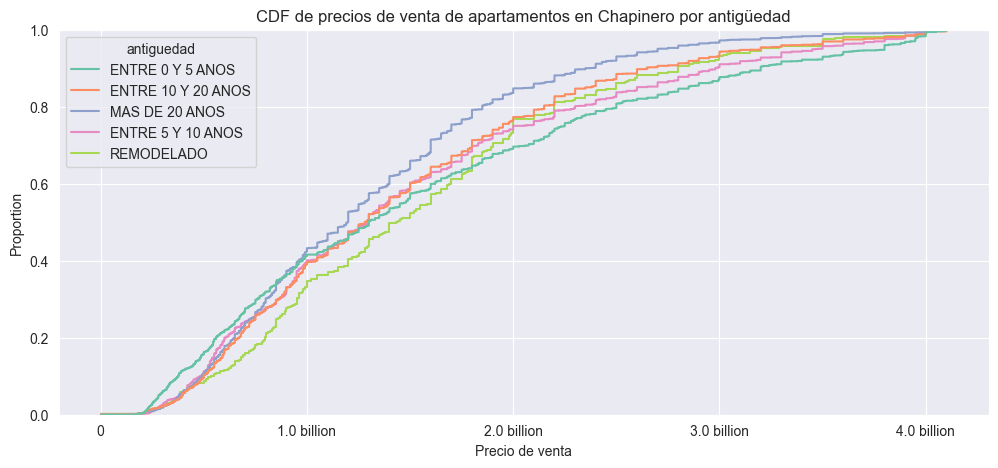

In [44]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    chapinero,
    x='precio_venta',
    hue='antiguedad',
    palette='Set2',
)

plt.title('CDF de precios de venta de apartamentos en Chapinero por antigüedad')
plt.xlabel('Precio de venta')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

### Estacion de TM Cercana

In [45]:
estacion_tm_cercana.groupby('estacion_tm_cercana')['precio_venta'].describe().sort_values('mean', ascending=False).applymap(lambda x: humanize.intword(x))

C:\Users\erik1\AppData\Local\Temp\ipykernel_3612\850847208.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  estacion_tm_cercana.groupby('estacion_tm_cercana')['precio_venta'].describe().sort_values('mean', ascending=False).applymap(lambda x: humanize.intword(x))


,count,mean,std,min,25%,50%,75%,max
estacion_tm_cercana,,,,,,,,
Calle 85,424,1.2 billion,651.0 million,361.0 million,650.0 million,1.1 billion,1.6 billion,3.6 billion
Virrey,412,1.2 billion,726.7 million,217.0 million,620.0 million,910.0 million,1.5 billion,3.9 billion
Héroes,27,1.1 billion,1.2 billion,2.1 million,525.0 million,550.0 million,995.0 million,4.0 billion
Calle 100,475,913.7 million,485.9 million,255.0 million,605.0 million,830.0 million,1.1 billion,3.7 billion
Calle 72,21,692.5 million,297.0 million,219.0 million,500.0 million,641.0 million,820.0 million,1.4 billion
Calle 76,45,690.8 million,406.0 million,200.0 million,400.0 million,620.0 million,800.0 million,2.0 billion
Flores,36,634.6 million,383.5 million,205.0 million,408.8 million,510.8 million,737.5 million,1.9 billion
Marly,77,420.0 million,329.2 million,180.0 million,280.0 million,337.0 million,459.0 million,2.9 billion
Calle 45,72,412.9 million,191.3 million,167.0 million,267.2 million,365.0 million,577.0 million,1.1 billion


In [46]:
estacion_tm_cercana_stats = estacion_tm_cercana.groupby('estacion_tm_cercana')['precio_venta'].describe().sort_values('mean', ascending=False)

c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


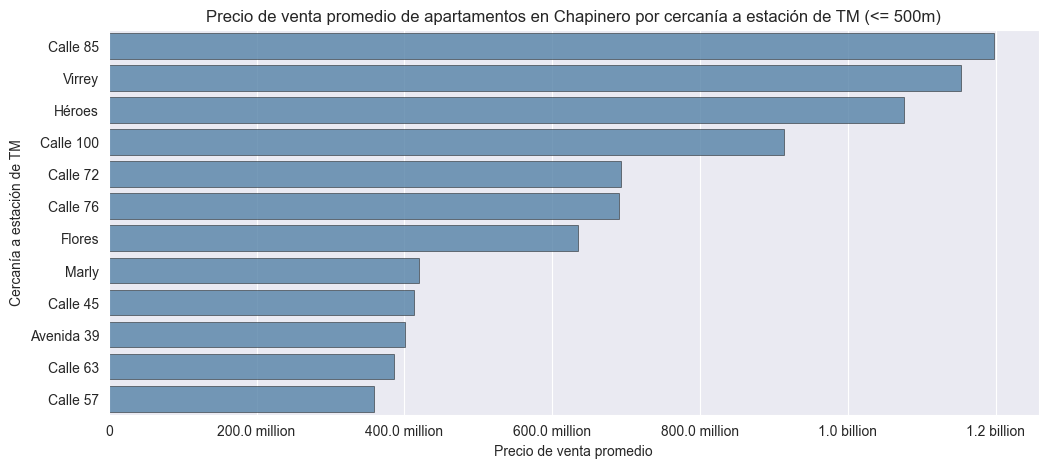

In [47]:
plt.figure(figsize=(12, 5))

sns.barplot(
    estacion_tm_cercana_stats,
    y=estacion_tm_cercana_stats.index,
    x='mean',
    color='steelblue',
    # palette='Set1',
    edgecolor='black',
    linewidth=.4,
    alpha=.8,
)

plt.title('Precio de venta promedio de apartamentos en Chapinero por cercanía a estación de TM (<= 500m)')
plt.xlabel('Precio de venta promedio')
plt.ylabel('Cercanía a estación de TM')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

### Precios Anteriores Vs Actuales

In [65]:
#selcionar todos los datos qut no tenga la columna precio_venta_anterior nula
chapinero_ant = chapinero[chapinero['precio_venta_anterior'].notna()]
chapinero_ant = chapinero_ant[chapinero_ant['fecha_actualizacion_precio_venta'].dt.month == 9]
chapinero_ant.shape

(115, 37)

c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

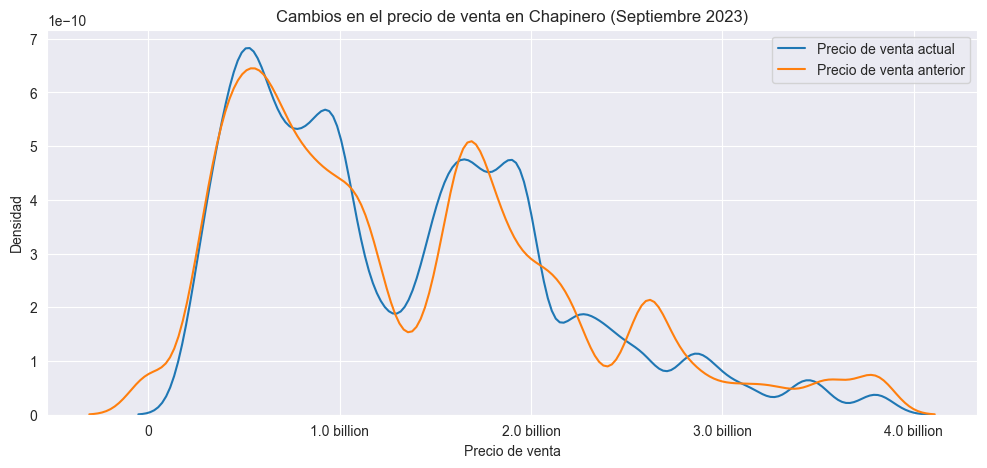

In [67]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    chapinero_ant,
    x='precio_venta',
    bw_adjust=.3,
    label='Precio de venta actual',
)

sns.kdeplot(
    chapinero_ant,
    x='precio_venta_anterior',
    bw_adjust=.3,
    label='Precio de venta anterior',
    # alpha=.7
)

#dibuja una linea en el promedio
# plt.axvline(chapinero_ant['precio_venta_anterior'].mean(), color='red', linestyle='--', label='Promedio', alpha=.5)
# plt.axvline(chapinero_ant['precio_venta'].median(), color='green', linestyle='--', label='Mediana', alpha=.5)

plt.title('Cambios en el precio de venta en Chapinero (Septiembre 2023)')
plt.xlabel('Precio de venta')
plt.ylabel('Densidad')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.legend()
plt.show()

c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

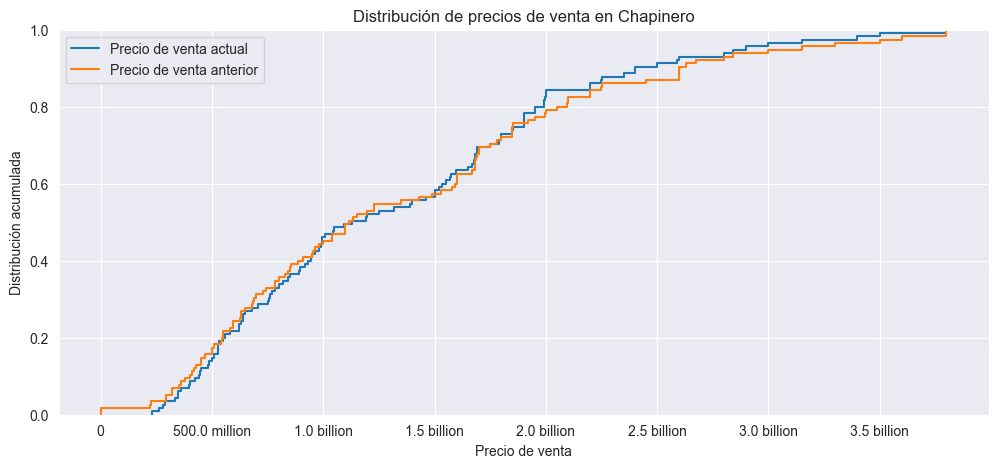

In [68]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    chapinero_ant,
    x='precio_venta',
    label='Precio de venta actual',
)

sns.ecdfplot(
    chapinero_ant,
    x='precio_venta_anterior',
    label='Precio de venta anterior',
    # alpha=.7
)

plt.title('Distribución de precios de venta en Chapinero')
plt.xlabel('Precio de venta')
plt.ylabel('Distribución acumulada')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.legend()
plt.show()

In [69]:
chapinero_ant.precio_venta.describe().apply(lambda x: humanize.intword(x)).to_frame().T

,count,mean,std,min,25%,50%,75%,max
precio_venta,115,1.3 billion,810.4 million,229.7 million,640.0 million,1.1 billion,1.9 billion,3.8 billion


In [70]:
chapinero_ant.precio_venta.describe().apply(lambda x: humanize.intword(x))

count              115
mean       1.3 billion
std      810.4 million
min      229.7 million
25%      640.0 million
50%        1.1 billion
75%        1.9 billion
max        3.8 billion
Name: precio_venta, dtype: object

In [71]:
chapinero_ant.precio_venta_anterior.describe().apply(lambda x: humanize.intword(x)).to_frame().T

,count,mean,std,min,25%,50%,75%,max
precio_venta_anterior,115,1.4 billion,889.8 million,1.0 million,627.5 million,1.1 billion,1.9 billion,3.8 billion


In [72]:
chapinero_ant.precio_venta_anterior.describe().apply(lambda x: humanize.intword(x))

count              115
mean       1.4 billion
std      889.8 million
min        1.0 million
25%      627.5 million
50%        1.1 billion
75%        1.9 billion
max        3.8 billion
Name: precio_venta_anterior, dtype: object

## Antiguedad

In [73]:
chapinero.antiguedad.value_counts()

antiguedad
MAS DE 20 ANOS        4205
ENTRE 10 Y 20 ANOS    2099
ENTRE 5 Y 10 ANOS     1618
ENTRE 0 Y 5 ANOS      1529
REMODELADO             389
Name: count, dtype: int64

c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


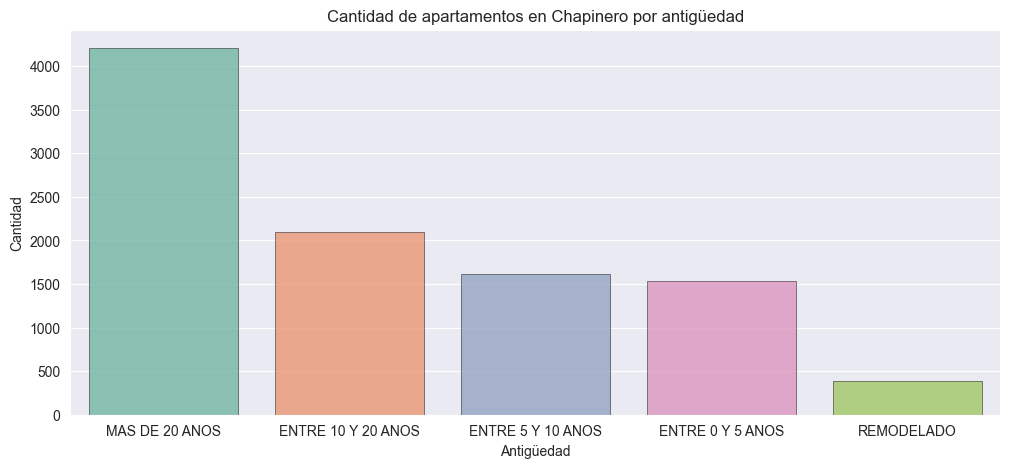

In [74]:
plt.figure(figsize=(12, 5))

sns.countplot(
    chapinero,
    x='antiguedad',
    order=chapinero.antiguedad.value_counts().index,
    palette='Set2',
    edgecolor='black',
    linewidth=.4,
    alpha=.8,
)

plt.title('Cantidad de apartamentos en Chapinero por antigüedad')
plt.xlabel('Antigüedad')
plt.ylabel('Cantidad')
plt.show()

### Barrios

In [75]:
chapinero.groupby('antiguedad')['barrio'].describe()

,count,unique,top,freq
antiguedad,,,,
ENTRE 0 Y 5 ANOS,1529,53,S.C. CHICO NORTE,198
ENTRE 10 Y 20 ANOS,2099,66,S.C. CHICO NORTE,280
ENTRE 5 Y 10 ANOS,1618,63,S.C. CHICO NORTE,215
MAS DE 20 ANOS,4205,72,S.C. CHICO NORTE,430
REMODELADO,389,49,S.C. BELLAVISTA,47


In [76]:
chapinero.groupby('antiguedad')['area'].describe().apply(lambda x: round(x,1))

,count,mean,std,min,25%,50%,75%,max
antiguedad,,,,,,,,
ENTRE 0 Y 5 ANOS,1529.0,134.3,79.5,1.0,67.0,123.5,183.0,404.0
ENTRE 10 Y 20 ANOS,2099.0,169.1,86.0,8.0,100.0,160.0,230.0,417.0
ENTRE 5 Y 10 ANOS,1618.0,154.0,81.9,6.9,84.0,140.0,206.6,412.0
MAS DE 20 ANOS,4205.0,184.5,84.4,4.0,118.0,174.0,240.9,423.0
REMODELADO,389.0,195.3,91.1,27.0,130.0,195.0,251.0,425.0


In [77]:
chapinero.groupby('barrio')['antiguedad'].describe().sort_values(by='count', ascending=False).head(10)

,count,unique,top,freq
barrio,,,,
S.C. CHICO NORTE,1164,5,MAS DE 20 ANOS,430
S.C. EL CHICO,905,5,MAS DE 20 ANOS,297
LOS ROSALES,898,5,MAS DE 20 ANOS,422
S.C. CHICO NORTE III SECTOR,857,5,MAS DE 20 ANOS,397
S.C. BELLAVISTA,644,5,MAS DE 20 ANOS,351
LA CABRERA,490,5,MAS DE 20 ANOS,228
S.C. ANTIGUO COUNTRY,458,5,ENTRE 0 Y 5 ANOS,149
S.C. EL NOGAL,403,5,MAS DE 20 ANOS,263
CHICO RESERVADO,390,5,ENTRE 10 Y 20 ANOS,133


### Estrato

## Barrios

In [78]:
chapinero.groupby('barrio')['codigo'].count().sort_values(ascending=False).to_frame().head(10)

,codigo
barrio,
S.C. CHICO NORTE,1165
S.C. EL CHICO,905
LOS ROSALES,898
S.C. CHICO NORTE III SECTOR,857
S.C. BELLAVISTA,646
LA CABRERA,490
S.C. ANTIGUO COUNTRY,458
S.C. EL NOGAL,403
CHICO RESERVADO,390


c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


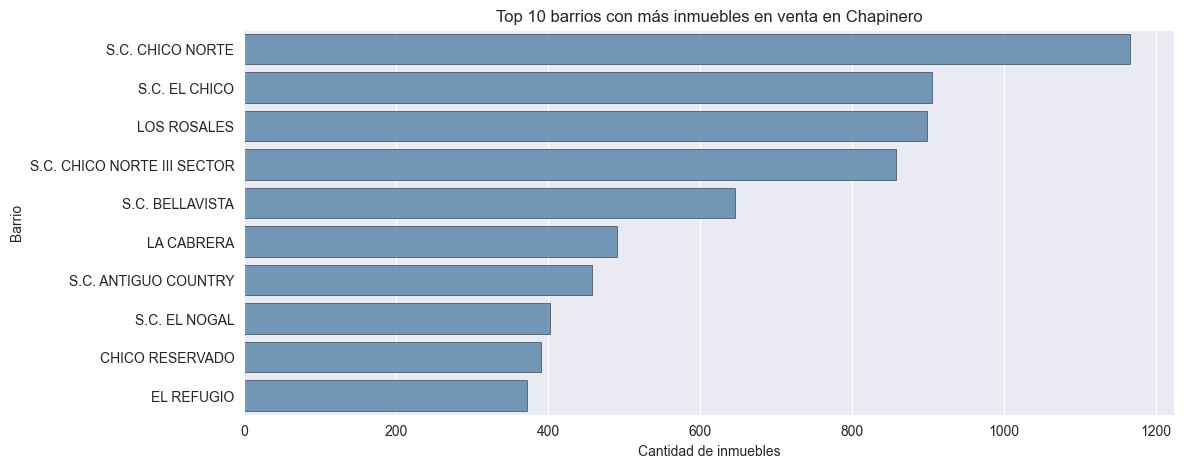

In [79]:
plt.figure(figsize=(12, 5))

sns.barplot(
    data=chapinero.groupby('barrio')['codigo'].count().sort_values(ascending=False).to_frame().head(10),
    x='codigo',
    y=chapinero.groupby('barrio')['codigo'].count().sort_values(ascending=False).to_frame().head(10).index,
    # palette='Set2',
    color='steelblue',
    orient='h',
    edgecolor='black',
    linewidth=.4,
    alpha=.8
)

plt.title('Top 10 barrios con más inmuebles en venta en Chapinero')
plt.xlabel('Cantidad de inmuebles')
plt.ylabel('Barrio')
plt.show()